<a href="https://colab.research.google.com/github/billiesumera/POLI-179/blob/main/FairFace_Image_Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! pip install bing-image-downloader

In [ ]:
! git clone https://github.com/dchen236/FairFace.git
! pip install dlib
%cd FairFace

!ls

Cloning into 'FairFace'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 220 (delta 4), reused 6 (delta 3), pack-reused 211
Receiving objects: 100% (220/220), 14.23 MiB | 27.87 MiB/s, done.
Resolving deltas: 100% (111/111), done.
/content/FairFace
detected_faces	examples	 predict.py  README.md	test_imgs.csv
dlib_models	predict_bbox.py  ReadMe      test	test_outputs.csv


# Job 1:Doctor

In [ ]:
! mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("doctor", limit=100,  output_dir='images', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/FairFace/images/doctor


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://pluspng.com/img-png/doctor-symbol-png-medical-symbol-caduceus-2000.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://img.washingtonpost.com/rf/image_1484w/2010-2019/WashingtonPost/2013/07/12/Health-Environment-Science/Images/iStock_000024597659Large.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.publicdomainpictures.net/pictures/210000/velka/doctor-1490804643Rfi.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://cdn6.dissolve.com/p/D2115_277_190/D2115_277_190_1200.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.pngall.com/wp-content/uploads/2016/06/Doctor-Symbol-Caduceus-PNG.png
[%] File Downloaded !

[%] Downloading Image #6 from https://media.npr.org/assets/news/2010/02/25/doctor-3900f8c9b6c5be80f3b2e509eafe9c41d7ad2671.jpg
[%] File Downloaded !

[%] Downloading I

In [ ]:
!ls 'images'/'doctor'

Image_100.png  Image_25.jpg  Image_40.jpg   Image_56.webp  Image_71.jpg  Image_87.jpg
Image_10.jpg   Image_26.jpg  Image_41.jpg   Image_57.jpg   Image_72.jpg  Image_88.jpg
Image_11.jpg   Image_27.jpg  Image_42.jpg   Image_58.jpg   Image_73.png  Image_89.jpg
Image_12.jpg   Image_28.jpg  Image_43.jpg   Image_59.jpg   Image_74.png  Image_8.jpg
Image_13.jpg   Image_29.jpg  Image_44.jpg   Image_5.png    Image_75.jpg  Image_90.jpg
Image_14.jpeg  Image_2.jpg   Image_45.jpg   Image_60.jpg   Image_76.jpg  Image_91.jpg
Image_15.jpg   Image_30.jpg  Image_46.jpg   Image_61.jpg   Image_77.jpg  Image_92.jpeg
Image_16.jpg   Image_31.png  Image_47.jpeg  Image_62.jpg   Image_78.jpg  Image_93.jpg
Image_17.jpg   Image_32.jpg  Image_48.jpg   Image_63.jpg   Image_79.jpg  Image_94.jpg
Image_18.jpg   Image_33.png  Image_49.jpg   Image_64.jpg   Image_7.jpg	 Image_95.jpg
Image_19.jpg   Image_34.jpg  Image_4.jpg    Image_65.jpeg  Image_80.jpg  Image_96.png
Image_1.jpg    Image_35.png  Image_50.jpg   Image_66.jp

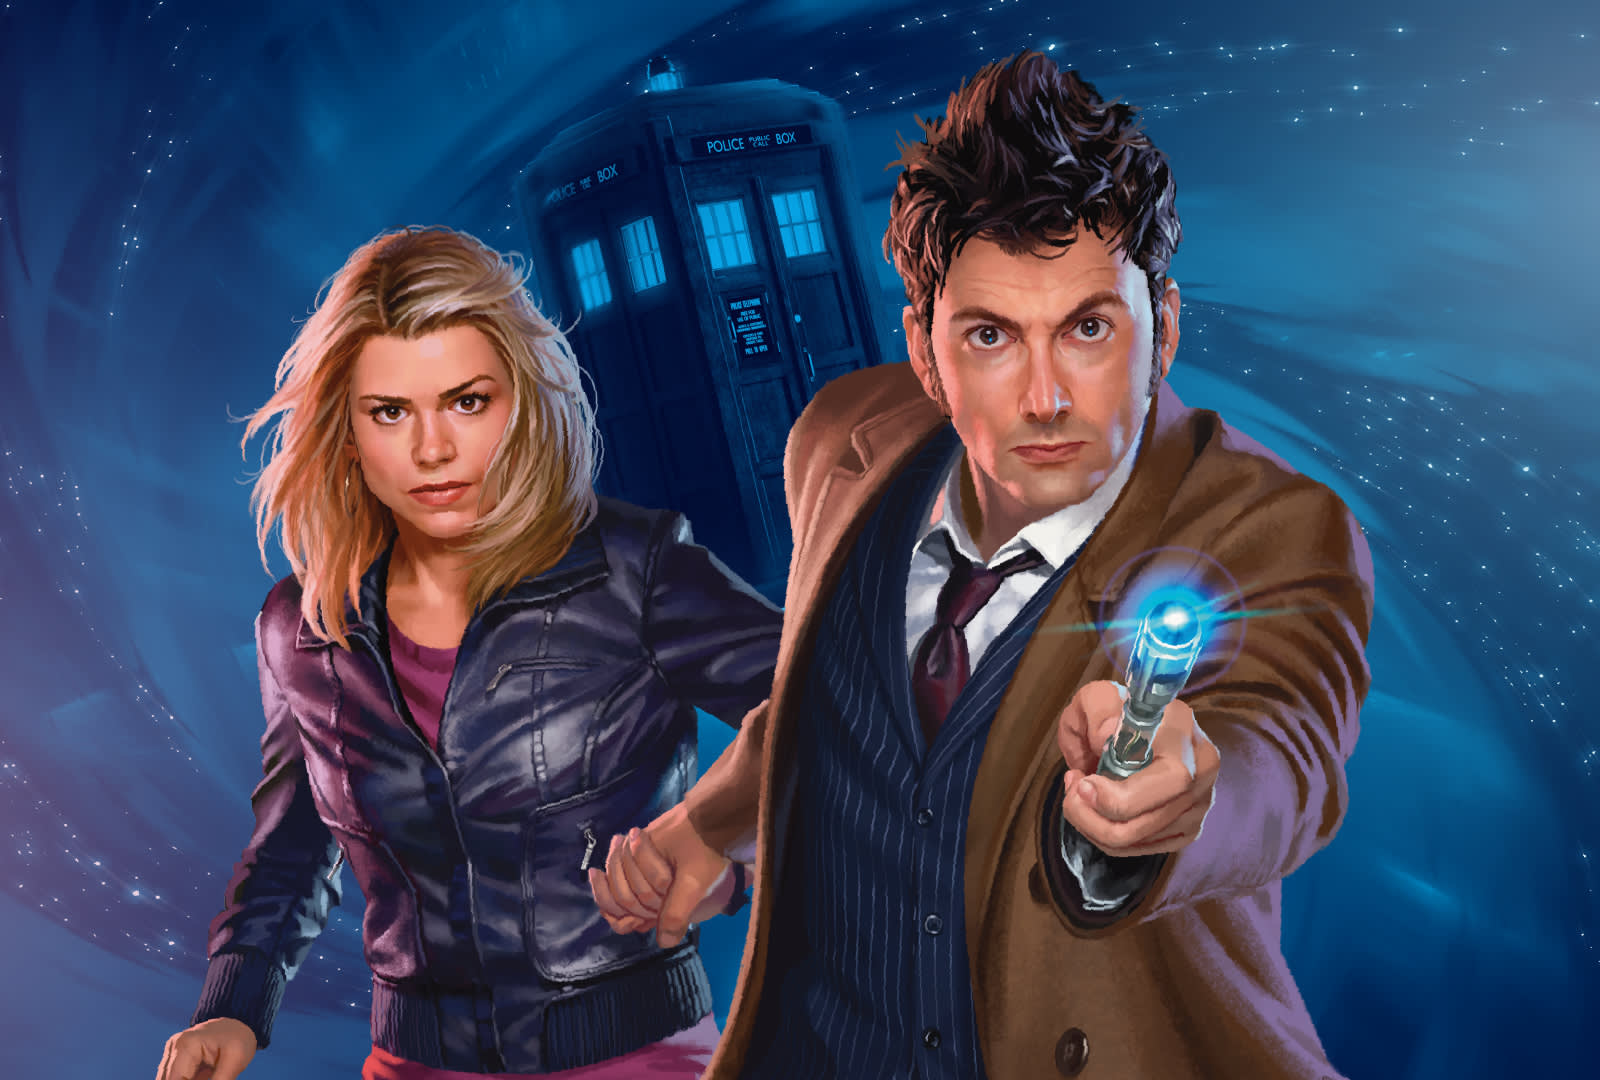

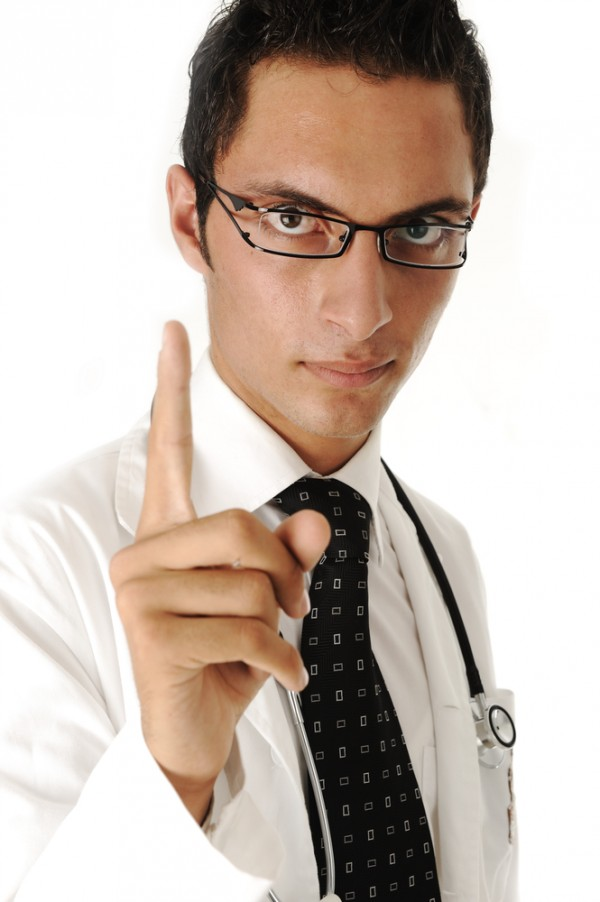

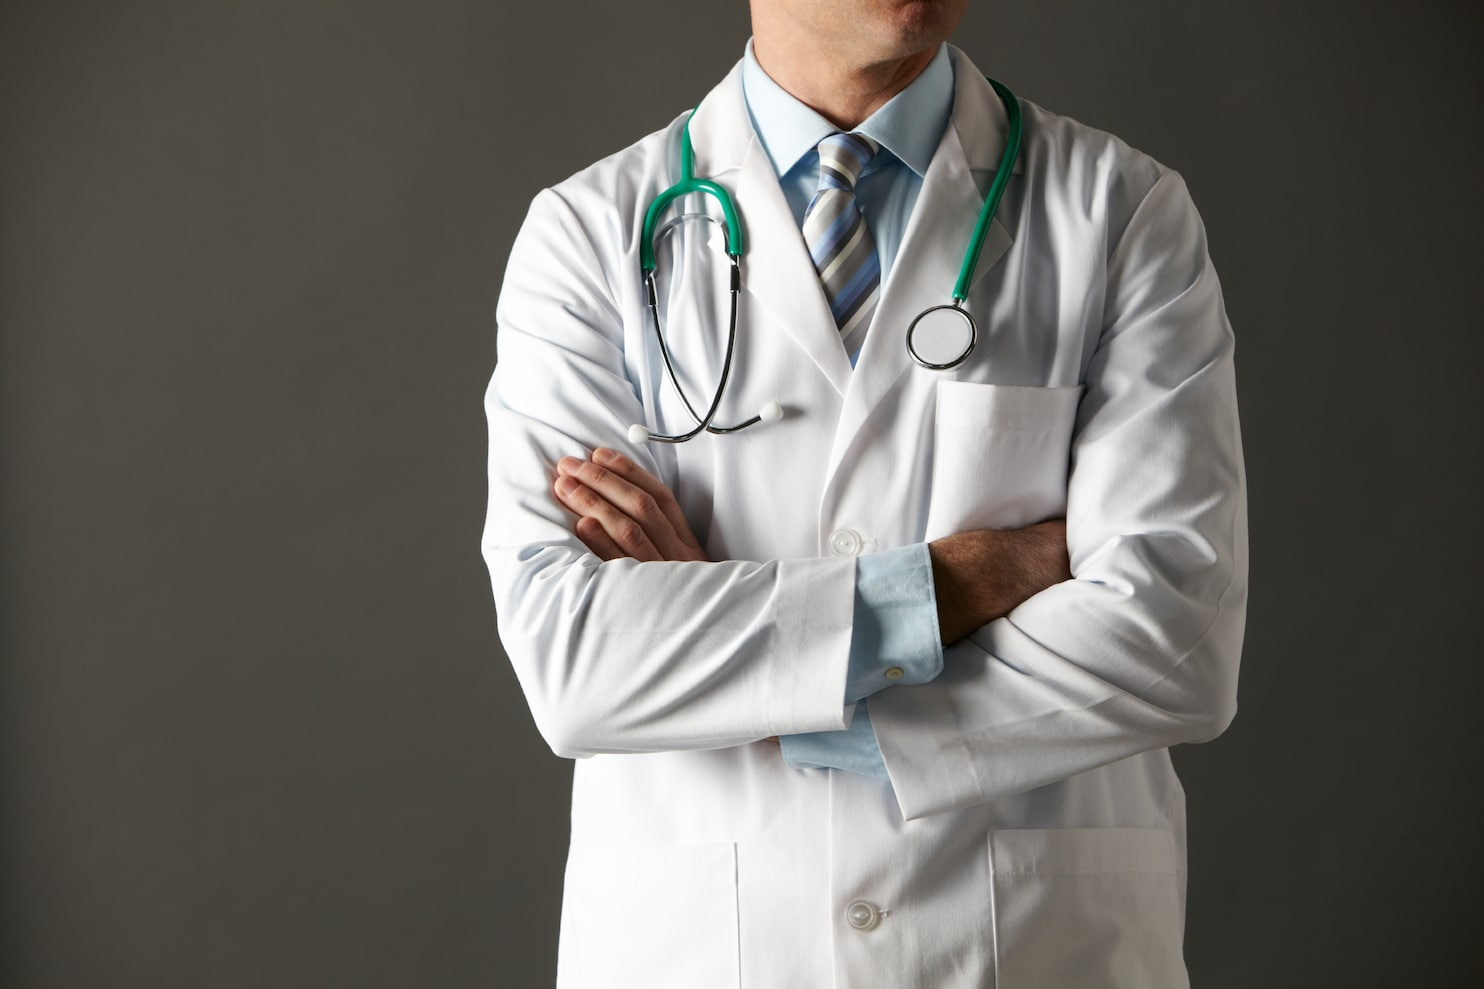

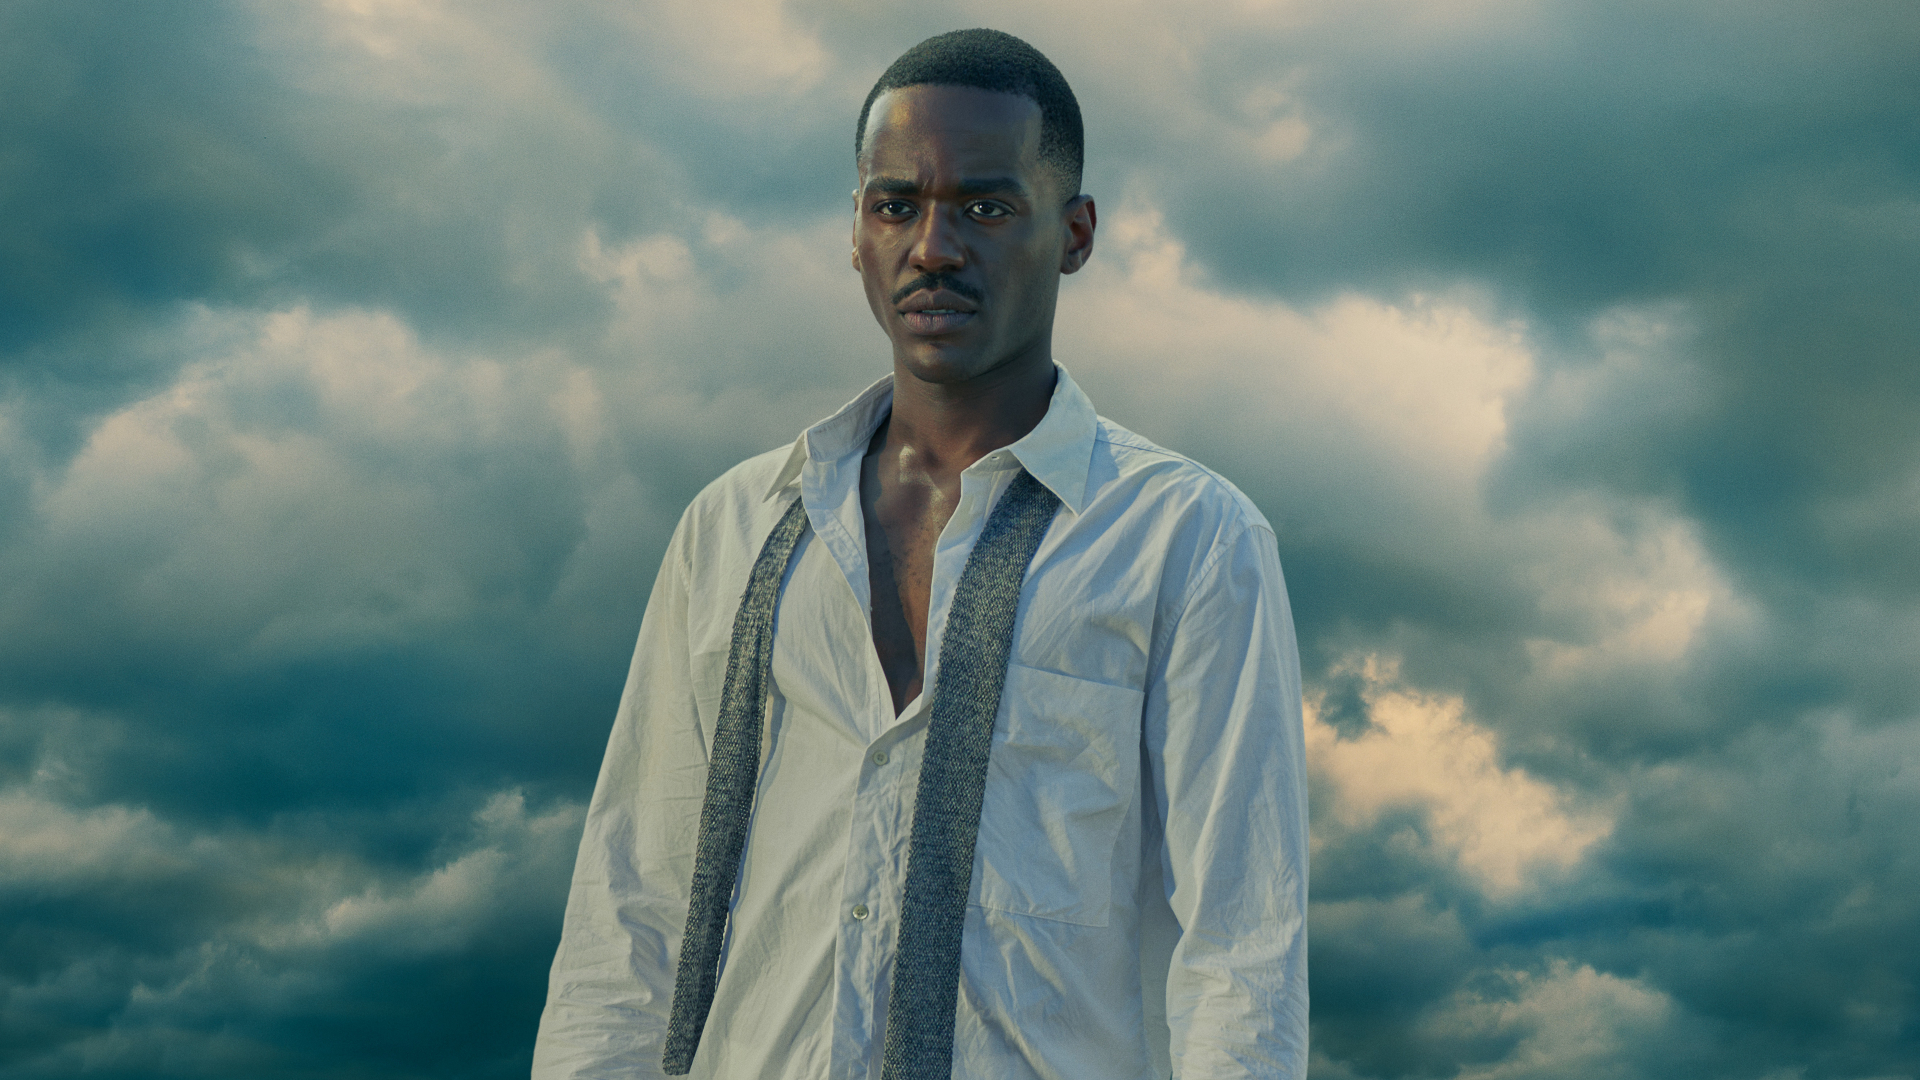

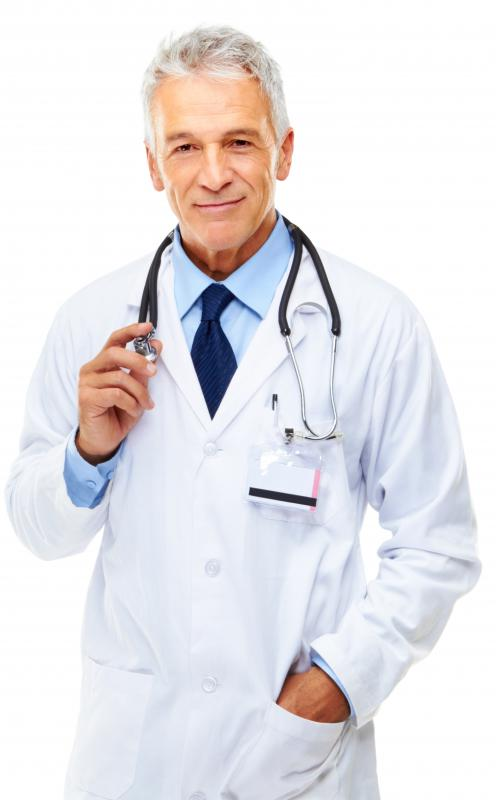

In [ ]:
from IPython.display import Image, display

doctor_images_path = 'images/doctor'

# files in the directory
doctor_image_files = os.listdir(doctor_images_path)

# Display the first 5 images as a sample
for doctor_image_file in doctor_image_files[:5]:
    display(Image(filename=os.path.join(doctor_images_path, doctor_image_file)))



# Gender Detection - Doctor


In [ ]:
doctor_images_path = 'images/doctor'  # Ensure this is the correct directory
doctor_image_files = [
   'Image_100.jpg', 'Image_25.jpg', 'Image_40.jpg', 'Image_56.jpg', 'Image_71.jpg', 'Image_87.jpg',
    'Image_10.jpg', 'Image_26.png', 'Image_41.jpg', 'Image_57.jpg', 'Image_72.jpg', 'Image_88.jpg',
    'Image_11.jpg', 'Image_27.jpg', 'Image_42.jpg', 'Image_58.jpg', 'Image_73.jpg', 'Image_89.jpg',
    'Image_12.jpeg', 'Image_28.jpg', 'Image_43.jpg', 'Image_59.jpg', 'Image_74.jpg', 'Image_8.jpg',
    'Image_13.jpg', 'Image_29.png', 'Image_44.jpg', 'Image_5.png', 'Image_75.jpg', 'Image_90.png',
    'Image_14.jpg', 'Image_2.jpg', 'Image_45.jpg', 'Image_60.jpg', 'Image_76.jpg', 'Image_91.png',
    'Image_15.jpg', 'Image_30.jpg', 'Image_46.png', 'Image_61.jpeg', 'Image_77.jpeg', 'Image_92.jpg',
    'Image_16.jpg', 'Image_31.png', 'Image_47.jpg', 'Image_62.jpg', 'Image_78.png', 'Image_93.jpg',
    'Image_17.jpg', 'Image_32.png', 'Image_48.jpg', 'Image_63.jpg', 'Image_79.png', 'Image_94.jpg',
    'Image_18.jpg', 'Image_33.jpg', 'Image_49.jpg', 'Image_64.jpg', 'Image_7.jpg', 'Image_95.png',
    'Image_19.jpg', 'Image_34.jpg', 'Image_4.jpg', 'Image_65.jpg', 'Image_80.jpg', 'Image_96.png',
    'Image_1.jpg', 'Image_35.jpg', 'Image_50.jpg', 'Image_66.jpg', 'Image_81.webp', 'Image_97.jpg',
    'Image_20.jpg', 'Image_36.jpg', 'Image_51.jpg', 'Image_67.jpg', 'Image_82.jpg', 'Image_98.jpg',
    'Image_21.jpg', 'Image_37.jpg', 'Image_52.jpeg', 'Image_68.jpeg', 'Image_83.jpg', 'Image_99.jpg',
    'Image_22.jpg', 'Image_38.jpg', 'Image_53.jpg', 'Image_69.jpg', 'Image_84.jpg', 'Image_9.jpg',
    'Image_23.jpg', 'Image_39.jpg', 'Image_54.jpg', 'Image_6.jpg', 'Image_85.jpg',
    'Image_24.jpg', 'Image_3.jpg', 'Image_55.jpg', 'Image_70.jpg', 'Image_86.jpeg'
]
doctor_csv_file_path = 'doctor_images.csv'

In [ ]:
print(f"Contents of {doctor_images_path}:")
print(os.listdir(doctor_images_path))

Contents of images/doctor:
['Image_50.jpg', 'Image_18.jpg', 'Image_2.jpg', 'Image_99.jpg', 'Image_86.jpg', 'Image_69.jpeg', 'Image_17.jpg', 'Image_71.jpg', 'Image_24.jpg', 'Image_54.jpeg', 'Image_12.jpg', 'Image_36.jpg', 'Image_10.jpg', 'Image_75.jpg', 'Image_31.png', 'Image_91.jpg', 'Image_14.jpeg', 'Image_94.jpg', 'Image_1.jpg', 'Image_28.jpg', 'Image_22.jpg', 'Image_25.jpg', 'Image_52.jpg', 'Image_74.png', 'Image_43.jpg', 'Image_70.jpg', 'Image_83.jpg', 'Image_3.jpg', 'Image_40.jpg', 'Image_88.jpg', 'Image_63.jpg', 'Image_4.jpg', 'Image_96.png', 'Image_59.jpg', 'Image_56.webp', 'Image_48.jpg', 'Image_20.jpg', 'Image_11.jpg', 'Image_53.jpg', 'Image_90.jpg', 'Image_100.png', 'Image_23.jpg', 'Image_76.jpg', 'Image_41.jpg', 'Image_16.jpg', 'Image_93.jpg', 'Image_92.jpeg', 'Image_81.jpg', 'Image_58.jpg', 'Image_39.jpg', 'Image_77.jpg', 'Image_60.jpg', 'Image_49.jpg', 'Image_37.jpg', 'Image_61.jpg', 'Image_62.jpg', 'Image_89.jpg', 'Image_19.jpg', 'Image_27.jpg', 'Image_7.jpg', 'Image_32.j

                                face_name_align             race  race4  gender    age                                                                                              race_scores_fair                                         race_scores_fair_4             gender_scores_fair                                                                                                                               age_scores_fair
0           detected_faces/race_Asian_face0.jpg       East Asian  Asian  Female  30-39         [7.7522168e-04 1.1608704e-05 2.9779517e-03 9.3841231e-01 5.7567190e-02\n 1.7392344e-04 8.1847618e-05]  [3.9179469e-03 1.9815963e-05 9.9597895e-01 8.3319537e-05]  [8.5034102e-05 9.9991494e-01]             [5.3760527e-07 2.0359068e-05 1.2785579e-03 9.3788564e-02 5.5962610e-01\n 3.0820602e-01 3.3311095e-02 3.7444085e-03 2.4384653e-05]
1          detected_faces/race_Latino_face0.jpg  Latino_Hispanic  Asian  Female  20-29                              [0.05775655 0.00232665 0.6

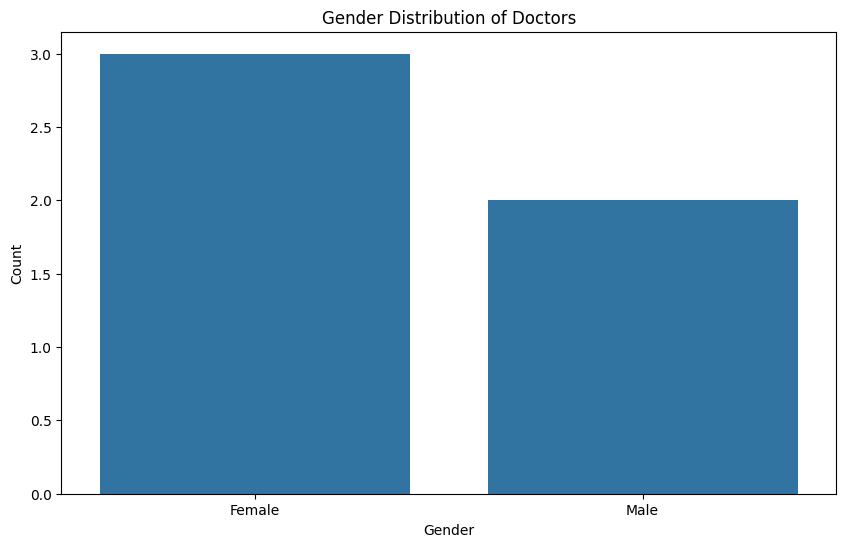

In [ ]:
# Check if the prediction results file exists
predicted_results_csv_file_path = 'test_outputs.csv'  # Ensure this is the correct path
if not os.path.exists(predicted_results_csv_file_path):
    raise FileNotFoundError(f"The file {predicted_results_csv_file_path} does not exist. Please check the prediction script output.")

# Load predictions from the output of your prediction script
results_df = pd.read_csv(predicted_results_csv_file_path)

# Print rows of the DataFrame
print(results_df.to_string())

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=results_df, x='gender')
plt.title('Gender Distribution of Doctors')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Job 2: Police

In [ ]:
from bing_image_downloader import downloader
downloader.download("police", limit=100,  output_dir='images', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/FairFace/images/police


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://www.panaynews.net/wp-content/uploads/2018/11/PNP-Police.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://mediad.publicbroadcasting.net/p/shared/npr/styles/x_large/nprshared/202007/875373155.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://2.bp.blogspot.com/-77ZdSnd2l1o/Vo9mKo_cq-I/AAAAAAAACTI/44o7FTBNcvs/s1600/PolicePhoto.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.annpettifor.com/wp-content/uploads/2011/10/Police-St-Pauls-1.jpg
[Error]Invalid image, not saving https://www.annpettifor.com/wp-content/uploads/2011/10/Police-St-Pauls-1.jpg

[!] Issue getting: https://www.annpettifor.com/wp-content/uploads/2011/10/Police-St-Pauls-1.jpg
[!] Error:: Invalid image, not saving https://www.annpettifor.com/wp-content/uploads/2011/10/Police-St-Pauls-1.jpg

[%] Downloading Image #4 from ht

In [ ]:
!ls 'images'/'police'

Image_100.jpg  Image_25.jpg   Image_40.png  Image_56.jpg  Image_71.JPG	 Image_87.jpg
Image_10.jpg   Image_26.jpg   Image_41.png  Image_57.jpg  Image_72.jpg	 Image_88.jpg
Image_11.jpg   Image_27.jpg   Image_42.jpg  Image_58.jpg  Image_73.JPG	 Image_89.jpg
Image_12.jpg   Image_28.png   Image_43.png  Image_59.jpg  Image_74.jpg	 Image_8.jpg
Image_13.jpg   Image_29.jpg   Image_44.jpg  Image_5.jpg   Image_75.jpg	 Image_90.jpg
Image_14.jpg   Image_2.jpg    Image_45.jpg  Image_60.jpg  Image_76.jpg	 Image_91.png
Image_15.JPG   Image_30.png   Image_46.jpg  Image_61.jpg  Image_77.png	 Image_92.jpg
Image_16.jpg   Image_31.jpg   Image_47.jpg  Image_62.jpg  Image_78.jpg	 Image_93.jpg
Image_17.jpg   Image_32.jpg   Image_48.jpg  Image_63.jpg  Image_79.jpg	 Image_94.jpg
Image_18.jpg   Image_33.jpg   Image_49.jpg  Image_64.jpg  Image_7.jpg	 Image_95.jpg
Image_19.jpg   Image_34.jpg   Image_4.jpg   Image_65.jpg  Image_80.jpg	 Image_96.jpg
Image_1.jpg    Image_35.jpg   Image_50.jpg  Image_66.jpg  Image_81.

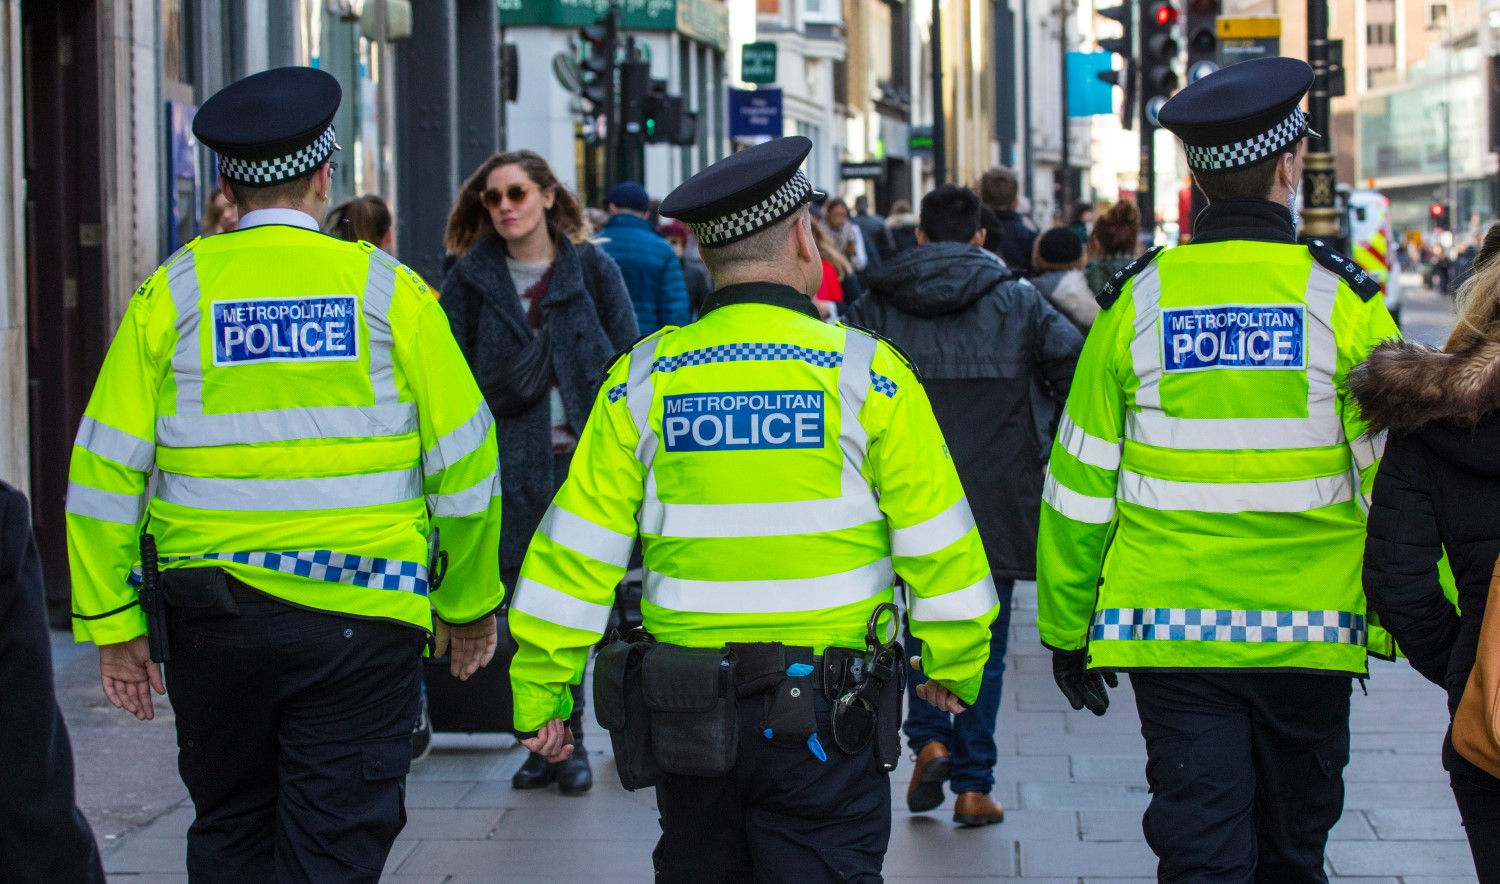

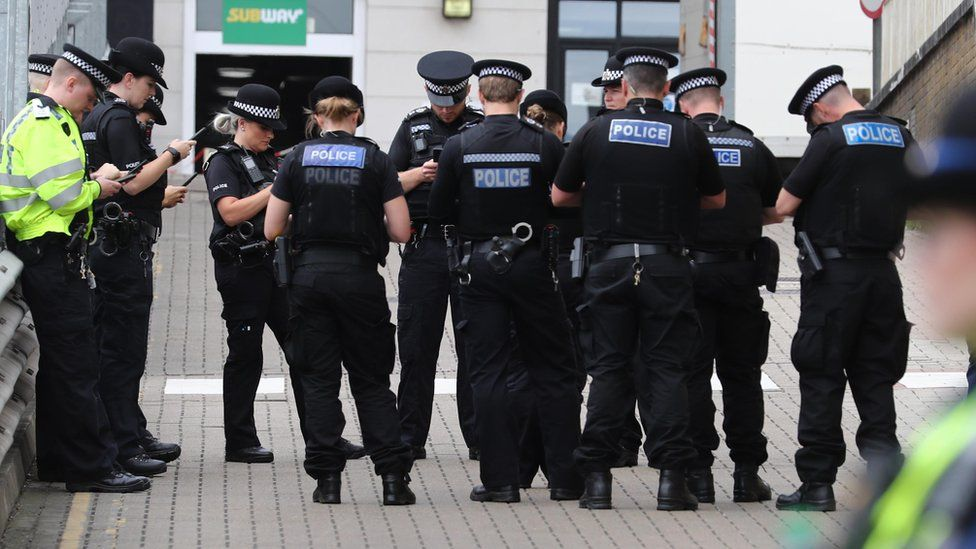

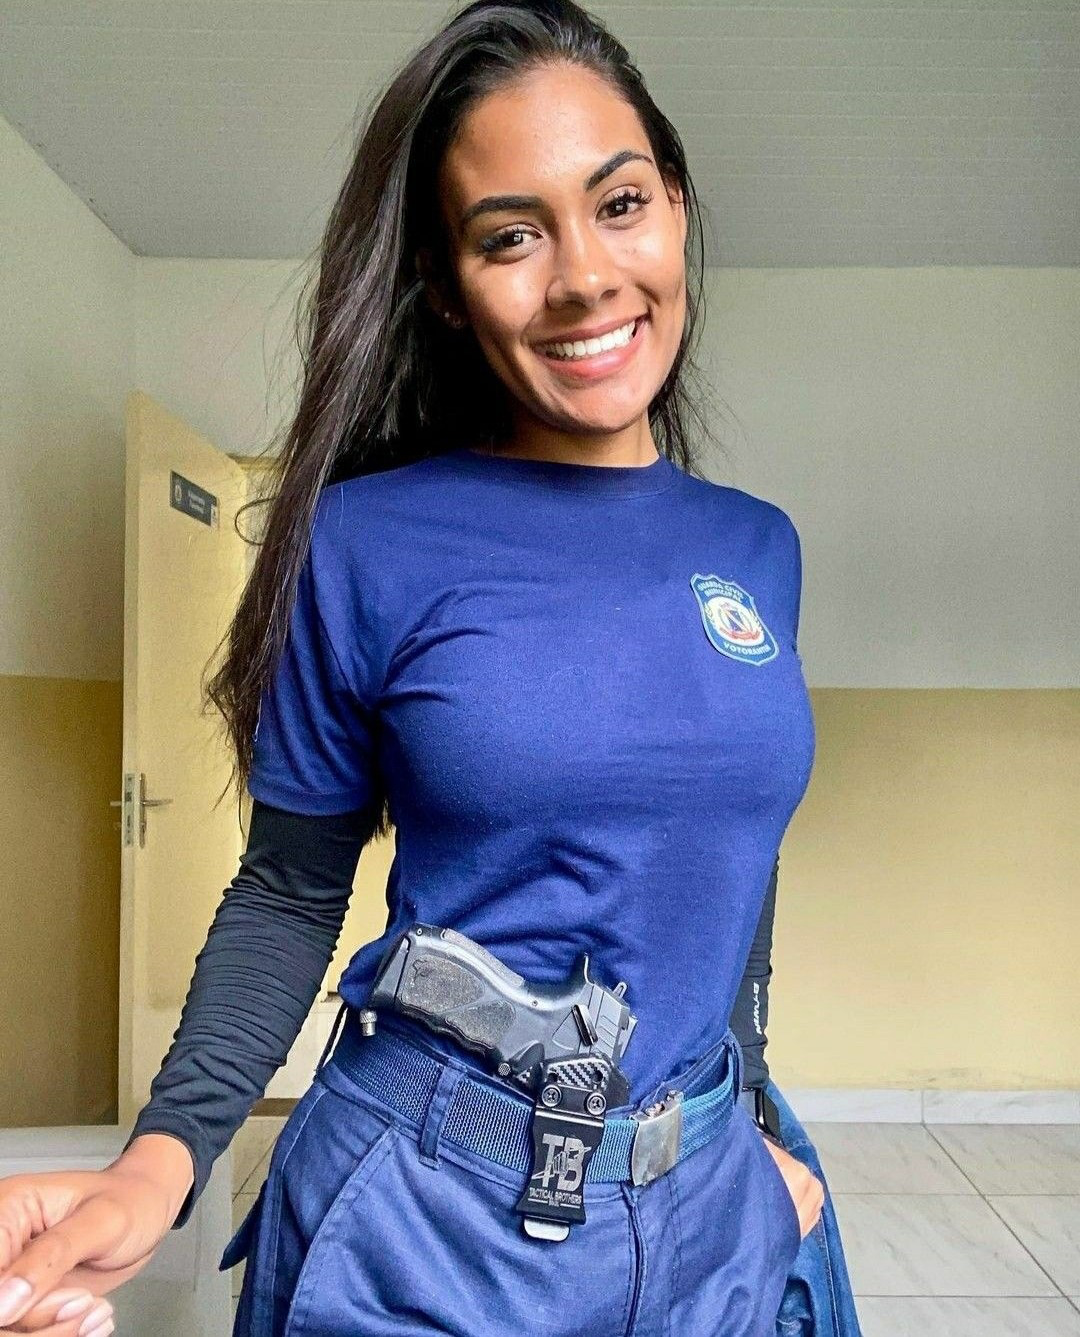

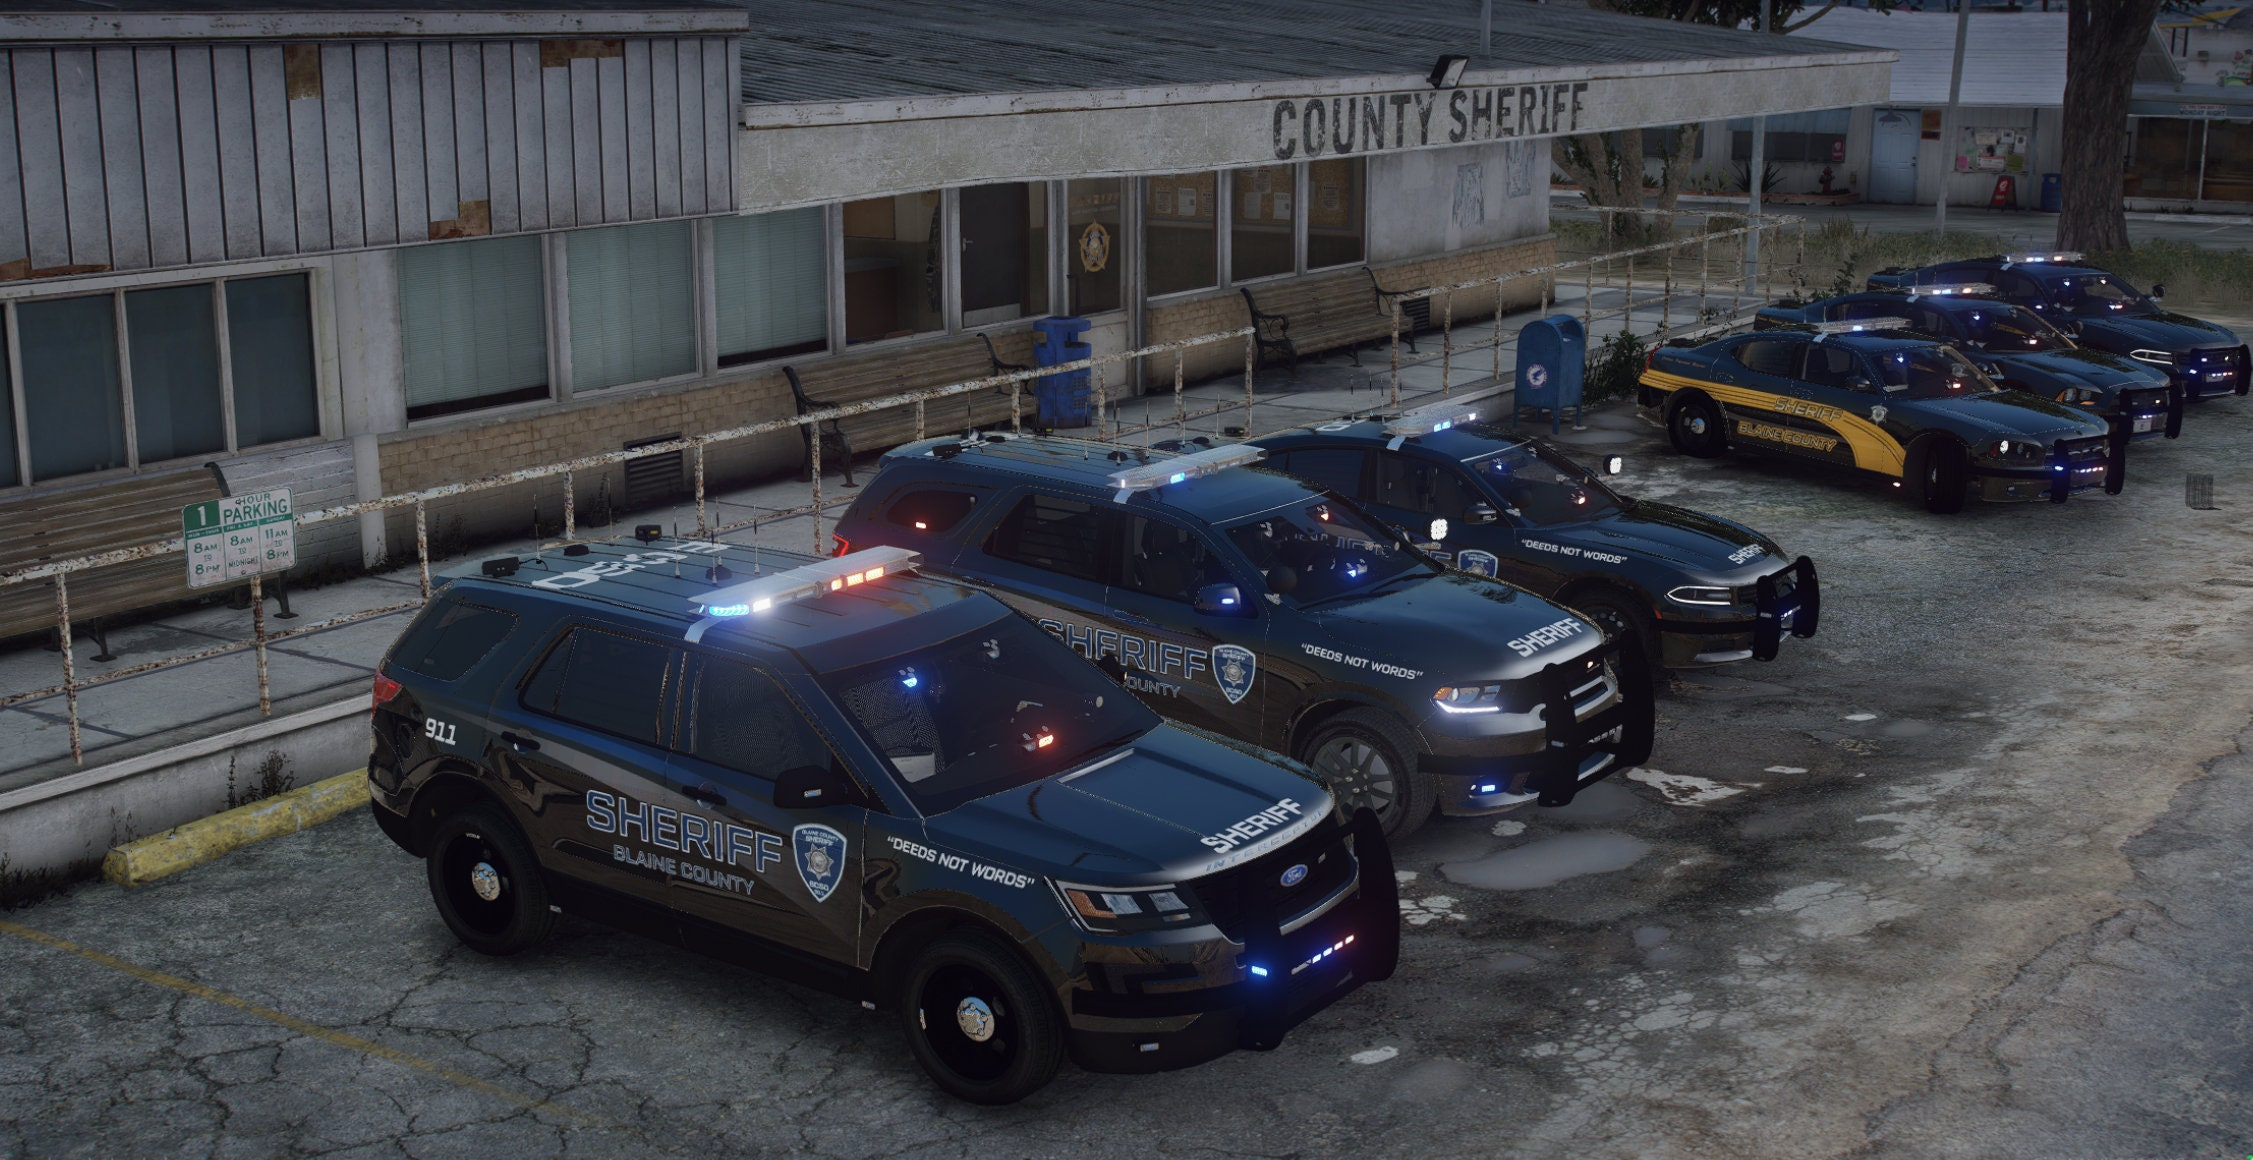

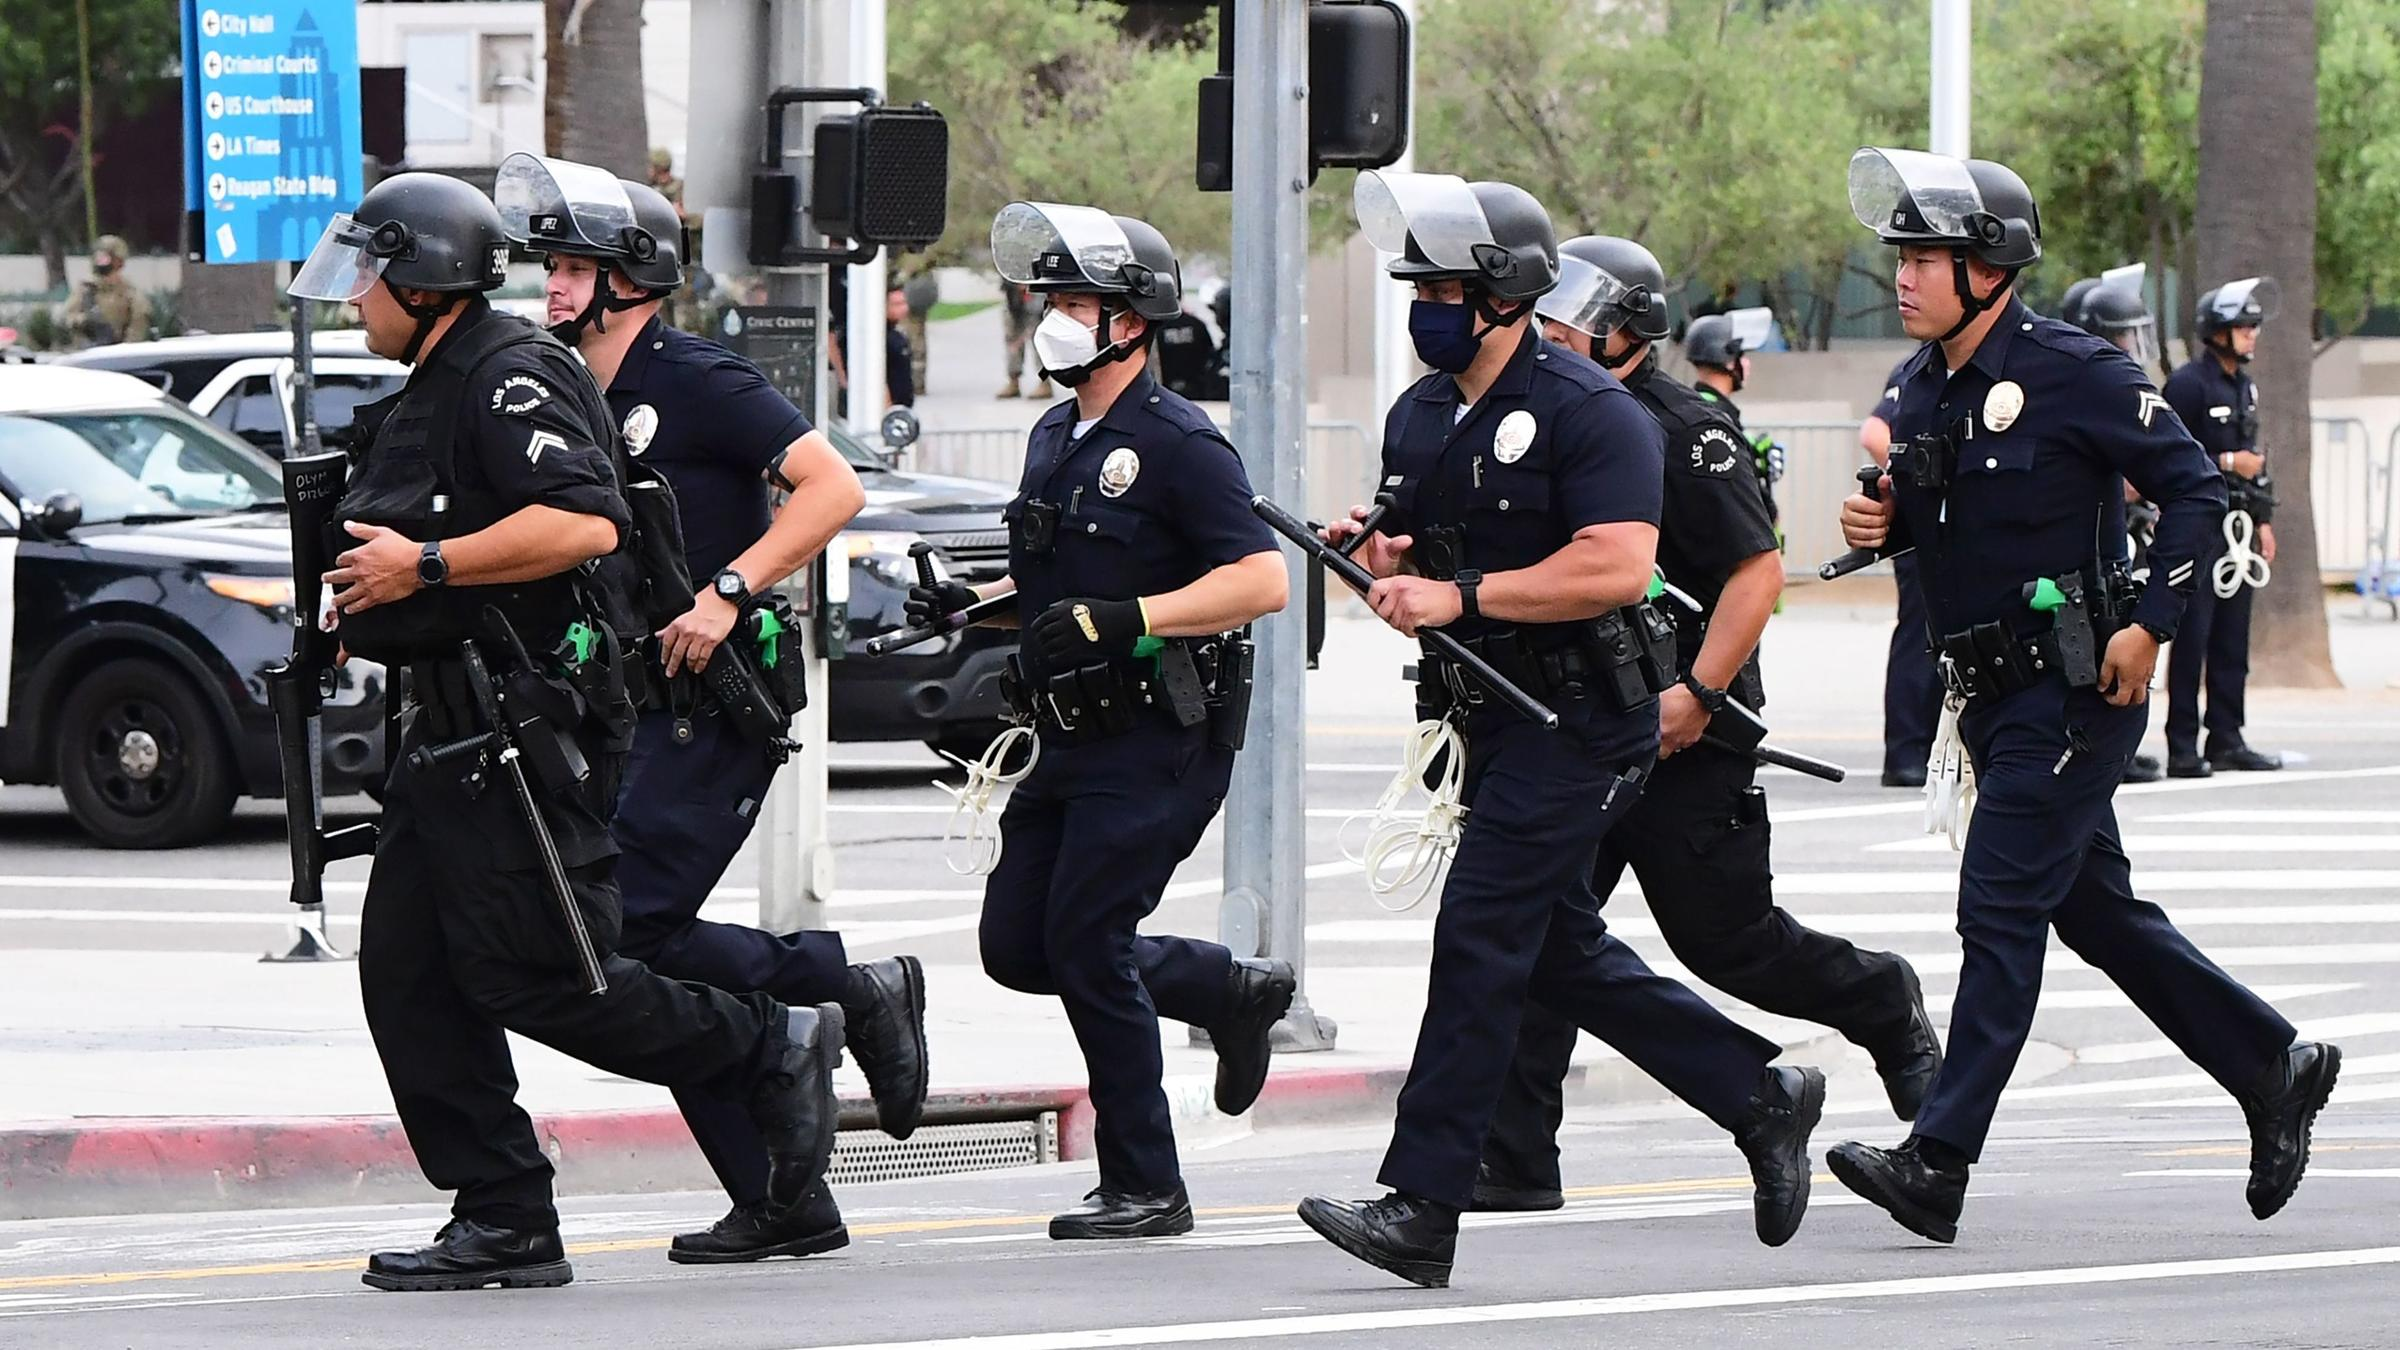

In [ ]:
police_images_path = 'images/police'

# files in the directory
police_image_files = os.listdir(police_images_path)

# Display the first 5 images as a sample
for police_image_file in police_image_files[:5]:
    display(Image(filename=os.path.join(police_images_path, police_image_file)))

# Gender Detection: Police

In [ ]:
police_images_path = 'images/police'  # Ensure this is the correct directory
police_image_files = [
    'Image_100.jpg', 'Image_23.jpg', 'Image_37.jpg', 'Image_50.jpg', 'Image_64.jpg', 'Image_78.jpg', 'Image_91.JPG',
    'Image_10.jpg', 'Image_24.png', 'Image_38.jpg', 'Image_51.jpg', 'Image_65.jpg', 'Image_79.jpg', 'Image_92.jpg',
    'Image_11.jpg', 'Image_25.jpg', 'Image_39.jpg', 'Image_52.jpg', 'Image_66.jpg', 'Image_7.jpg', 'Image_93.png',
    'Image_12.jpg', 'Image_26.jpg', 'Image_3.jpg', 'Image_53.jpg', 'Image_67.jpeg', 'Image_80.png', 'Image_94.jpg',
    'Image_13.jpg', 'Image_27.jpg', 'Image_40.jpg', 'Image_54.jpg', 'Image_68.jpg', 'Image_81.jpg', 'Image_95.jpg',
    'Image_14.jpg', 'Image_28.jpg', 'Image_41.png', 'Image_55.jpg', 'Image_69.jpg', 'Image_82.jpg', 'Image_96.jpg',
    'Image_15.png', 'Image_29.jpg', 'Image_42.jpg', 'Image_56.jpg', 'Image_6.JPG', 'Image_83.jpg', 'Image_97.jpg',
    'Image_16.png', 'Image_2.jpg', 'Image_43.jpg', 'Image_57.jpg', 'Image_70.webp', 'Image_84.jpg', 'Image_98.jpg',
    'Image_17.jpg', 'Image_30.jpg', 'Image_44.jpg', 'Image_58.jpg', 'Image_71.jpg', 'Image_85.jpg', 'Image_99.jpg',
    'Image_18.png', 'Image_31.jpg', 'Image_45.jpg', 'Image_59.jpg', 'Image_72.jpg', 'Image_86.jpg', 'Image_9.jpg',
    'Image_19.png', 'Image_32.jpg', 'Image_46.jpg', 'Image_5.jpg', 'Image_73.png', 'Image_87.jpg',
    'Image_1.png', 'Image_33.jpg', 'Image_47.jpg', 'Image_60.jpeg', 'Image_74.jpg', 'Image_88.jpg',
    'Image_20.jpg', 'Image_34.jpg', 'Image_48.jpg', 'Image_61.png', 'Image_75.jpg', 'Image_89.jpg',
    'Image_21.jpeg', 'Image_35.jpg', 'Image_49.jpg', 'Image_62.png', 'Image_76.jpg', 'Image_8.jpg',
    'Image_22.jpg', 'Image_36.jpg', 'Image_4.jpg', 'Image_63.jpg', 'Image_77.jpg', 'Image_90.jpg'
]
police_csv_file_path = 'police_images.csv'

In [ ]:
!python3 predict.py --csv "police_images.csv"

using CUDA?: True
Traceback (most recent call last):
  File "/content/FairFace/predict.py", line 214, in <module>
    imgs = pd.read_csv(args.input_csv)['img_path']
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 912, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 577, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1407, in __init__
    self._engine = self._make_engine(f, self.engine)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1661, in _make_engine
    self.handles = get_handle(
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/common.py", line 859, in get_handle
    handle = open(
FileNotFoundError: [Errno 2] No such file or directory: 'police_images.csv'


In [ ]:
# Convert predictions to DataFrame
results_df = pd.DataFrame(predictions)

# Results DataFrame to a CSV file
police_results_csv_file_path = 'police_results.csv'
results_df.to_csv(police_results_csv_file_path, index=False)

# Read and print all the results
results_df = pd.read_csv(police_results_csv_file_path)

# Print rows of the DataFrame
print(results_df.to_string())

# Gender distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=results_df, x='gender')
plt.title('Gender Distribution of Police')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

NameError: name 'predictions' is not defined

# Job 3: Dancer

In [ ]:
from bing_image_downloader import downloader
downloader.download("dancer", limit=100,  output_dir='images', adult_filter_off=True, force_replace=False)

In [ ]:
!ls 'images'/'dancer'

In [ ]:
dancer_images_path = 'images/dancer'

# files in the directory
dancer_image_files = os.listdir(dancer_images_path)

# Display the first 5 images as a sample
for dancer_image_file in dancer_image_files[:5]:
    display(Image(filename=os.path.join(dancer_images_path, dancer_image_file)))

# Job 4: Teacher

In [ ]:
from bing_image_downloader import downloader
downloader.download("teacher", limit=100,  output_dir='images', adult_filter_off=True, force_replace=False)

In [ ]:
teacher_images_path = 'images/teacher'

# files in the directory
teacher_image_files = os.listdir(teacher_images_path)

# Display the first 5 images as a sample
for teacher_image_file in teacher_image_files[:5]:
    display(Image(filename=os.path.join(teacher_images_path, teacher_image_file)))

# Job 5: Reporter

In [ ]:
from bing_image_downloader import downloader
downloader.download("reporter", limit=100,  output_dir='images', adult_filter_off=True, force_replace=False)

In [ ]:
reporter_images_path = 'images/reporter'

# files in the directory
reporter_image_files = os.listdir(reporter_images_path)

# Display the first 5 images as a sample
for reporter_image_file in reporter_image_files[:5]:
    display(Image(filename=os.path.join(reporter_images_path, reporter_image_file)))